<hr/>
<h1>Employee Turnover Analytics</h1>
<hr/>

### Import Dependencies || Packages
<hr/>

In [1]:
# Import the neccessary modules for data manipulation and visual representation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import roc_auc_score

### Load the Dataset
<hr/>

In [79]:
#read the data from csv 
data = pd.read_csv("emp_turnover.csv", encoding="ISO-8859-1")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,attrition
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


### Data Quality Checking 
<hr/>

In [3]:
# Can you check to see if there are any missing values in our data set
data.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
work_accident            False
promotion_last_5years    False
department               False
salary                   False
attrition                False
dtype: bool

In [4]:
#check the feature title of dataset
for i,j in enumerate(data.columns):
    print(i, "," , j)

0 , satisfaction_level
1 , last_evaluation
2 , number_project
3 , average_montly_hours
4 , time_spend_company
5 , work_accident
6 , promotion_last_5years
7 , department
8 , salary
9 , attrition


In [9]:
# raname the features in the dataset, easy to read and work on it.
# Renaming certain columns for better readability

data = data.rename(
    columns={'satisfaction_level': 'satisfaction_level', 
            'last_evaluation': 'evaluation',
            'number_project': 'number_project',
            'average_montly_hours': 'avg_monthly_hours',
            'time_spend_company': 'time_spend_with_company',
            'Work_accident': 'work_accident',
            'promotion_last_5years': 'promotion',
            'department' : 'department',
             'salary':'salary',
            'attrition' : 'turnover_lebel'
})

In [10]:
# Check the type of our features. Are there any data inconsistencies?
data.dtypes

satisfaction_level         float64
evaluation                 float64
number_project               int64
avg_monthly_hours            int64
time_spend_with_company      int64
work_accident                int64
promotion                    int64
department                  object
salary                      object
turnover_lebel               int64
dtype: object

### Exploratory Data Analysis | EDA
<hr/>

In [11]:
#check the number of dataset's shape
data.shape

(14999, 10)

In [12]:
# Calculate the turnover rate of our company's dataset. What's the rate of turnover?
employee_turnover_rate = (data.turnover_lebel.value_counts() / 14999)
employee_turnover_rate

0    0.761917
1    0.238083
Name: turnover_lebel, dtype: float64

In [13]:
# Display the statistical overview of the employees
data.describe()

,satisfaction_level,evaluation,number_project,avg_monthly_hours,time_spend_with_company,work_accident,promotion,turnover_lebel
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [14]:
# Display the mean summary of Employees (Turnover V.S. Non-turnover). What do you notice between the groups?

turnover_summary = data.groupby('turnover_lebel')
turnover_summary.mean()

,satisfaction_level,evaluation,number_project,avg_monthly_hours,time_spend_with_company,work_accident,promotion
turnover_lebel,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


,satisfaction_level,evaluation,number_project,avg_monthly_hours,time_spend_with_company,work_accident,promotion,turnover_lebel
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,-0.388375
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787
avg_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287
time_spend_with_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788
turnover_lebel,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000


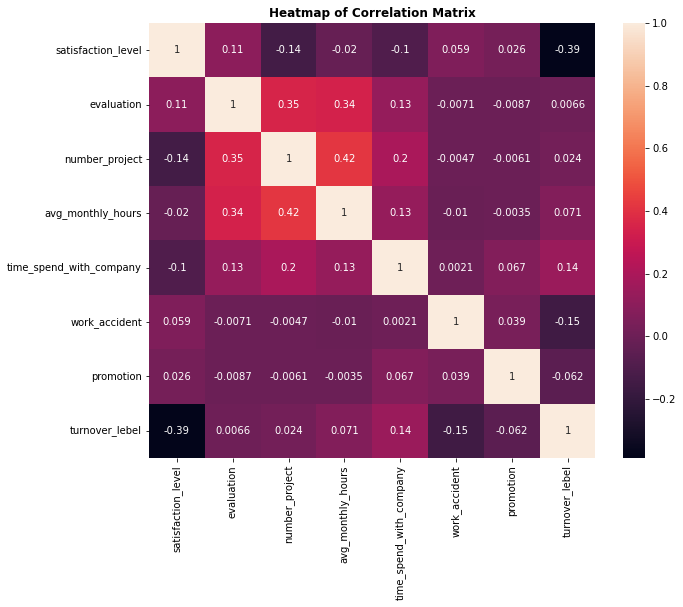

In [19]:
# Create a correlation matrix. What features correlate the most with turnover? What other correlations did you find?

plt.figure(figsize=(10,8))

correlation = data.corr()
correlation = (correlation)
sns.heatmap(correlation, 
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values, annot=True)

plt.title('Heatmap of Correlation Matrix', fontweight='bold')
correlation

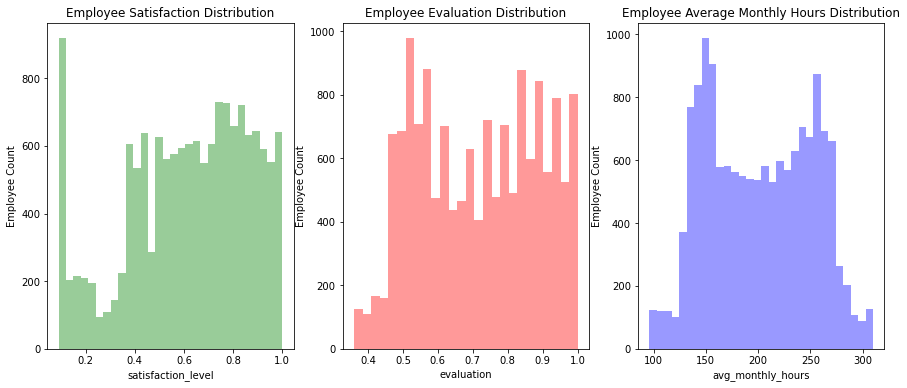

In [26]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(data.satisfaction_level, kde = False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(data.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(data.avg_monthly_hours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

plt.show()

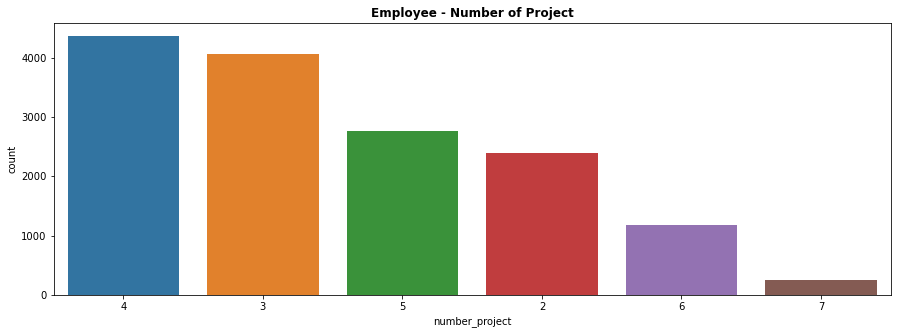

In [64]:
plt.figure(figsize=(15,5))
sns.countplot(x=data.number_project,  order = data['number_project'].value_counts().index)
plt.title('Employee - Number of Project', fontweight='bold')
plt.show()

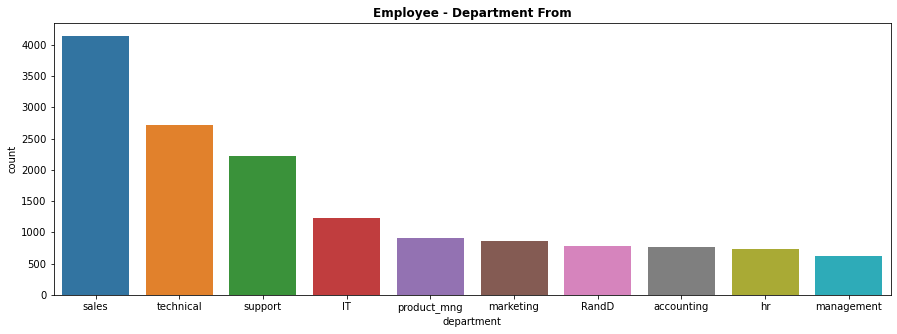

In [66]:
plt.figure(figsize=(15,5))
sns.countplot(x=data.department, order = data['department'].value_counts().index)
plt.title('Employee - Department From', fontweight='bold')
plt.show()

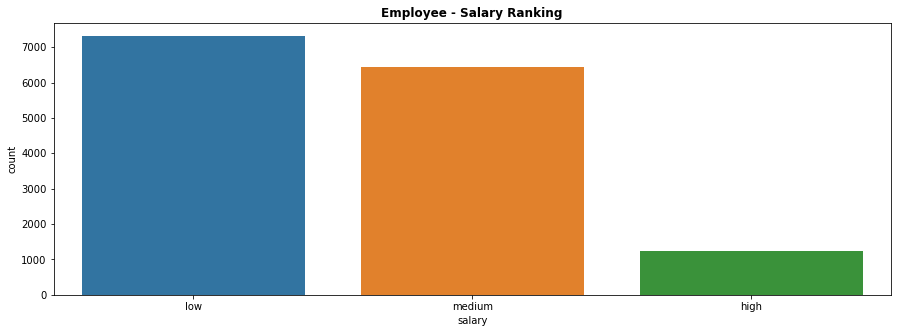

In [67]:
plt.figure(figsize=(15,5))
sns.countplot(x=data.salary,  order = data['salary'].value_counts().index)
plt.title('Employee - Salary Ranking', fontweight='bold')
plt.show()

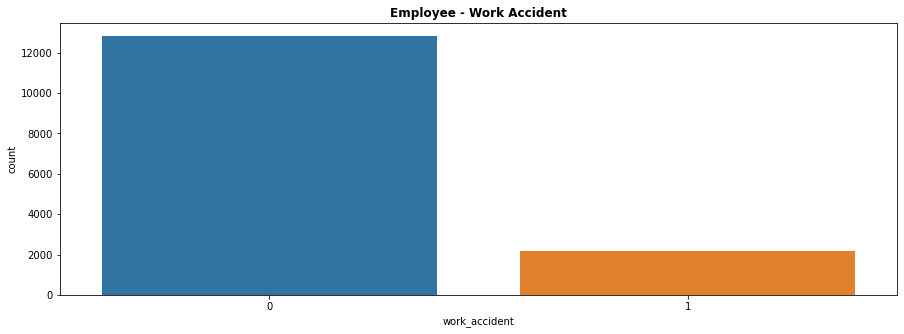

In [76]:
plt.figure(figsize=(15,5))
sns.countplot(x=data.work_accident,  order = data['work_accident'].value_counts().index)
plt.title('Employee - Work Accident', fontweight='bold')
plt.show()

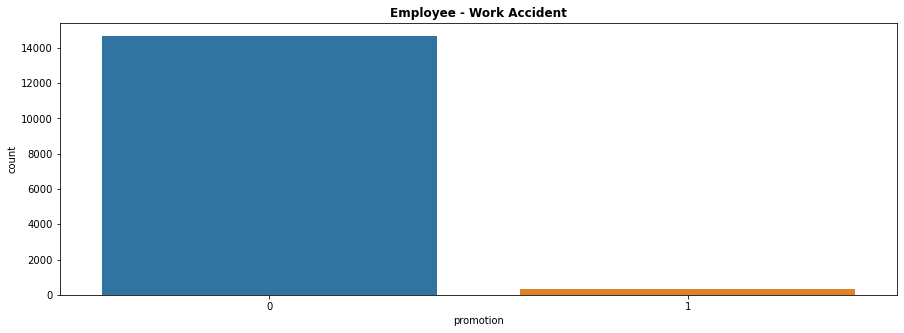

In [77]:
plt.figure(figsize=(15,5))
sns.countplot(x=data.promotion,  order = data['promotion'].value_counts().index)
plt.title('Employee - Work Accident', fontweight='bold')
plt.show()

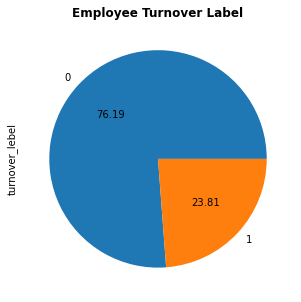

In [70]:
#let see turnover label

plt.figure(figsize=(10,5))
data['turnover_lebel'].value_counts().plot.pie(autopct='%.2f')
plt.title('Employee Turnover Label', fontweight='bold')
plt.show()

### Data Preprocessing 
<hr/>

In [28]:
#Apply get_dummies() to the categorical variables. Seperate categorical variables and numeric variables, then combine them.


category_variable = ['department','salary','turnover_lebel','promotion']
numerical_variable = ['satisfaction_level','evaluation','number_project','avg_monthly_hours','time_spend_with_company', 'work_accident']
categorical_data = pd.get_dummies(data[category_variable], drop_first=True)
numerical_data = data[numerical_variable]

df = pd.concat([categorical_data , numerical_data], axis=1)
df.head()

,turnover_lebel,promotion,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,satisfaction_level,evaluation,number_project,avg_monthly_hours,time_spend_with_company,work_accident
0,1,0,0,0,0,0,0,0,1,0,0,1,0,0.38,0.53,2,157,3,0
1,1,0,0,0,0,0,0,0,1,0,0,0,1,0.80,0.86,5,262,6,0
2,1,0,0,0,0,0,0,0,1,0,0,0,1,0.11,0.88,7,272,4,0
3,1,0,0,0,0,0,0,0,1,0,0,1,0,0.72,0.87,5,223,5,0
4,1,0,0,0,0,0,0,0,1,0,0,1,0,0.37,0.52,2,159,3,0


In [31]:
# Create the X and y set
X = df.iloc[:,1:]
y = df.iloc[:,0]

# Define train and test
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=123, stratify=y)

### Training The Random Forest Classifier Algorithm
<hr >

In [32]:
%%time

from sklearn.ensemble import RandomForestClassifier
# Random Forest Model
rfc_model = RandomForestClassifier(class_weight="balanced")
# Fit the Random Forest Classifier Model
rfc_model = rfc_model.fit(X_train, y_train)

CPU times: user 733 ms, sys: 278 ms, total: 1.01 s
Wall time: 2.45 s


In [36]:
# Define the 10-Fold Cross Validation
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
# Define the evaluation metric 
scoring = 'roc_auc'


rfc_results = model_selection.cross_val_score(rfc_model, X_train, y_train, cv=kfold, scoring=scoring)

array([0.9965625 , 0.99783191, 0.99736923, 0.98321204, 0.98524768,
       0.9939978 , 0.98946111, 0.99652308, 0.99445606, 0.99146758])

In [38]:
#print each accuracy of kfold cross validation
for i,j in enumerate(rfc_results):
    print(i," / ", j)

0  /  0.9965625
1  /  0.9978319099378882
2  /  0.9973692301106402
3  /  0.9832120397410342
4  /  0.9852476823672629
5  /  0.9939977965142079
6  /  0.9894611111111109
7  /  0.996523079525186
8  /  0.994456062048409
9  /  0.9914675767918087


In [42]:
# Print out the mean and standard deviation of the training score
rfc_auc = rfc_results.mean()
print("**"*54)
print()
print("The Random Forest AUC: %.3f and the STD is (%.3f)" % (rfc_auc, rfc_results.std()))
print()
print("**"*54)

************************************************************************************************************

The Random Forest AUC: 0.993 and the STD is (0.005)

************************************************************************************************************


In [46]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Random Forest Model---")
print()
print()
rfc_roc_auc = roc_auc_score(y_test, rfc_model.predict(X_test))
print ("Random Forest AUC = %2.2f" % rfc_roc_auc)
print(classification_report(y_test, rfc_model.predict(X_test)))



 ---Random Forest Model---


Random Forest AUC = 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2286
           1       0.99      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [82]:
# Get Feature Importances
feature_importances = pd.DataFrame(rfc_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,satisfaction_level,0.251866
1,time_spend_with_company,0.228140
2,number_project,0.167418
3,avg_monthly_hours,0.166746
4,evaluation,0.134817
5,work_accident,0.011691
6,salary_low,0.009870
7,department_technical,0.004632
8,salary_medium,0.004433
9,department_sales,0.004104


<AxesSubplot:xlabel='importance', ylabel='index'>

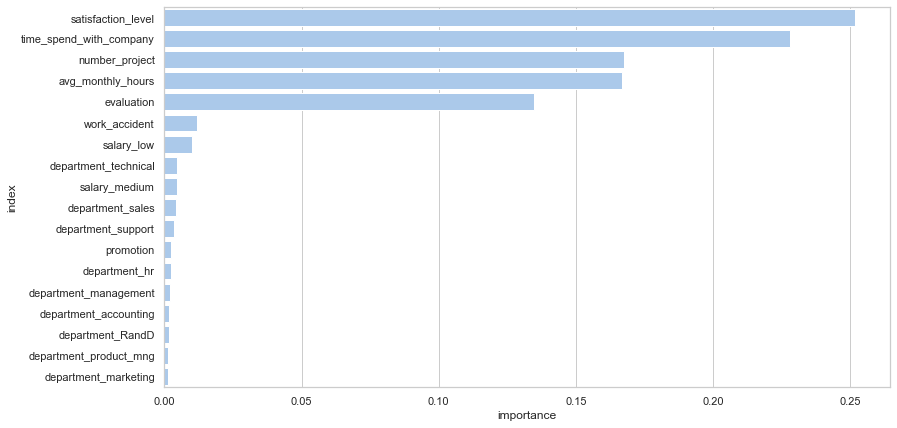

In [83]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the total schools per city
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,
            label="Total", color="b")

In [84]:
#make the prediction 

rfc_model.predict_proba(X_test)[175:200,]

array([[0.98, 0.02],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.91, 0.09],
       [0.95, 0.05],
       [0.04, 0.96],
       [0.18, 0.82],
       [0.98, 0.02],
       [0.92, 0.08],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.02, 0.98],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.78, 0.22],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.97, 0.03],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.03, 0.97],
       [0.  , 1.  ],
       [0.99, 0.01]])

In [ ]:
 s